# Wczytujemy dane
Format pliku to `fif`, surowy plik więc będziemy potrzebowali `read_raw_fif` z `mne.io` (podmoduł mne-pythona do operacji input-output).  
Wcześniej za pomocą `os.getcwd` oraz `os.chdir` wejdziemy do folderu z plikiem i wylistujemy sobie jego zawartość korzystając z `os.listdir`.

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\swps\\Dropbox\\Sarenka\\ZAJECIA\\Analiza Danych EEG 2017 - 2018\\notebooks'

In [3]:
data_dir = (r'C:\Users\swps\Dropbox\Sarenka\ZAJECIA\Analiza Danych EEG 2017 - 2018\dane')

os.chdir(data_dir)
os.getcwd()

'C:\\Users\\swps\\Dropbox\\Sarenka\\ZAJECIA\\Analiza Danych EEG 2017 - 2018\\dane'

In [4]:
files = os.listdir()
print(files)

['ds_rest_120-raw.fif']


In [5]:
import mne

raw = mne.io.read_raw_fif(files[0], preload=True)

Opening raw data file C:\Users\swps\Dropbox\Sarenka\ZAJECIA\Analiza Danych EEG 2017 - 2018\dane\ds_rest_120-raw.fif...
    Range : 0 ... 134217 =      0.000 ...   536.868 secs
Ready.
Reading 0 ... 134217  =      0.000 ...   536.868 secs...


# Podstawowe informacje pliku

In [6]:
# lista nazw kanałów
print(raw.ch_names)

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8', 'Cz']


In [7]:
# częstotliwość próbkowania
raw.info['sfreq']

250.0

In [8]:
# dane w postaci macierzy kanały na próbki czasowe
data = raw.get_data()
data.shape

(64, 134218)

In [9]:
# czas rejestracji to liczba próbek / częstotliwość próbkowania
time_in_seconds = data.shape[1] / raw.info['sfreq']

print('Rejestracja trwała', time_in_seconds, 'sekund',
      'czyli około', round(time_in_seconds / 60), 'minut.')

Rejestracja trwała 536.872 sekund czyli około 9 minut.


In [12]:
%matplotlib inline

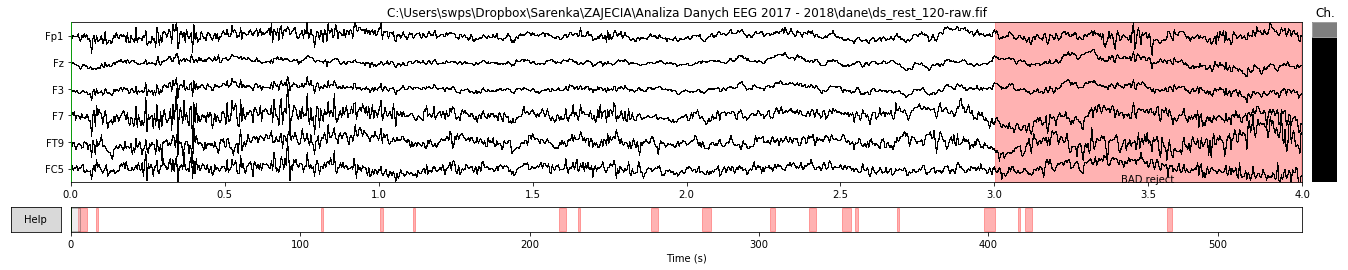

In [14]:
raw.plot(n_channels=6, duration=4.);

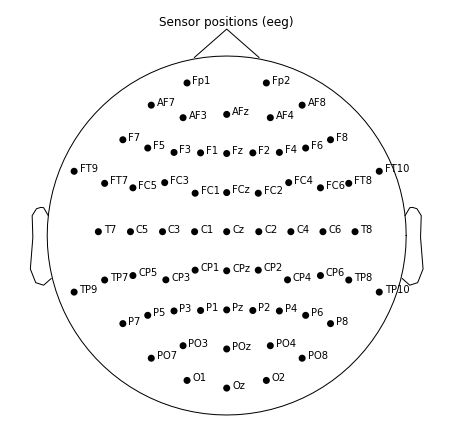

In [15]:
raw.plot_sensors(show_names=True);

In [16]:
chan_idx = raw.ch_names.index('Oz')

In [17]:
import matplotlib.pyplot as plt

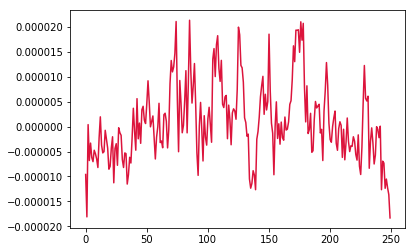

In [18]:
plt.plot(data[chan_idx, 2000:2250], color='crimson')

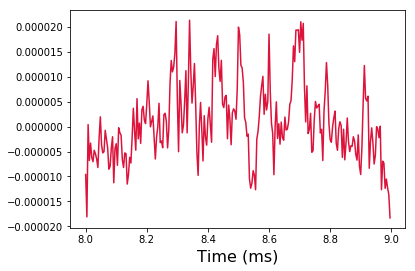

In [19]:
plt.plot(raw.times[2000:2250],
        data[chan_idx, 2000:2250], color='crimson')
plt.xlabel('Time (ms)', fontsize=16)

In [20]:
czas_zamknięcia_oczu = 11.24
próbka_zamknięcia_oczu = czas_zamknięcia_oczu * raw.info['sfreq']
print(próbka_zamknięcia_oczu)

2810.0


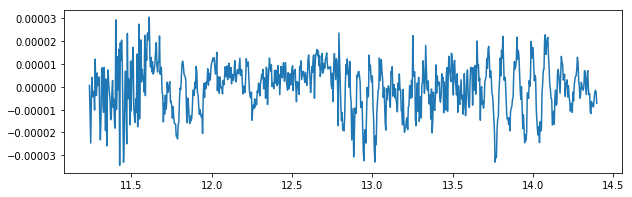

In [21]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(raw.times[2810:3600], data[chan_idx, 2810:3600])

## Plan działania:
* widmo dla 60 sekund po zamknięciu oczu (dla wybranej elektrody)
* wykres dla widma
* widmo dla wycinka 12.5 - 13.5 oraz 13.5 - 14.5
* wykres dla obu widm na jednym wykresie
* parametry widma: `n_fft`, `n_overlap`
* wiele elektrod - wybieramy z użyciem plot_sensors
* wiele elektrod - widmo + wykres
* znajdujemy zakres oscylacji alfa
* wyświetlamy widmo na głowie
* dwa wykresy "główkowe", wykres różnicy

In [22]:
import mne

mne.__version__

'0.15.dev0'

In [23]:
from mne.time_frequency import psd_welch

psd, freq = psd_welch(raw, picks=chan_idx)

Effective window size : 1.024 (s)


In [24]:
freq.shape

(129,)

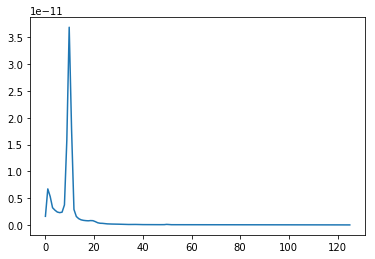

In [25]:
plt.plot(freq, psd[0])

In [26]:
psd_closed, freq = psd_welch(raw, tmin=11.24,
                             tmax=41.24, fmax=25.,
                             picks=chan_idx, n_fft=500,
                            n_overlap=250)

Effective window size : 2.000 (s)


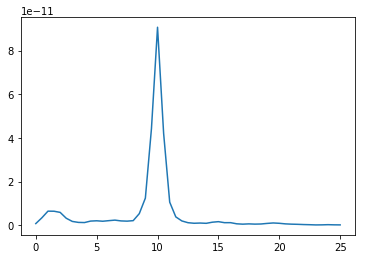

In [27]:
plt.plot(freq, psd_closed[0])

In [28]:
psd_op, freq = psd_welch(raw, tmin=76.332,
                             tmax=76.332+30, fmax=25.,
                             picks=chan_idx, n_fft=500,
                            n_overlap=250)

Effective window size : 2.000 (s)


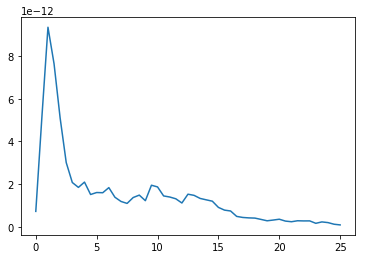

In [29]:
plt.plot(freq, psd_op[0])

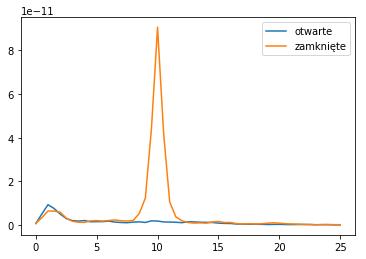

In [30]:
plt.plot(freq, psd_op[0], label='otwarte')
plt.plot(freq, psd_closed[0], label='zamknięte')
plt.legend()

Ze względu na to, że czasem jeden peak dominuje wszystko inne na wykresie, często wyświetlamy widmo logarytmizując moc:

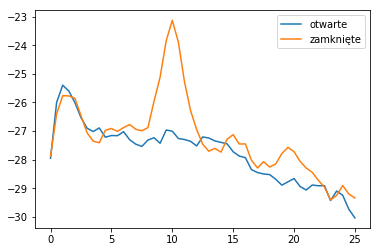

In [32]:
import numpy as np

plt.plot(freq, np.log(psd_op[0]), label='otwarte')
plt.plot(freq, np.log(psd_closed[0]), label='zamknięte')
plt.legend()

In [38]:
psd, freq = psd_welch(raw, fmax=25.)

Effective window size : 1.024 (s)


In [34]:
psd.shape

(64, 129)

In [35]:
psd.T.shape

(129, 64)

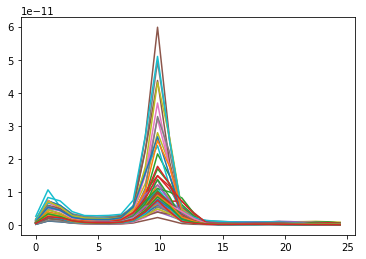

In [39]:
plt.plot(freq, psd.T);

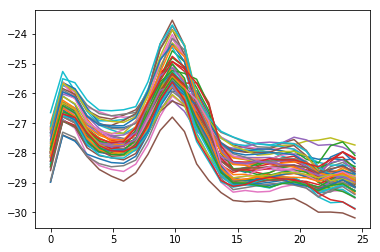

In [40]:
plt.plot(freq, np.log(psd.T));

In [41]:
# znajdujemy peak alphy
alpha = np.where(freq >= 10)[0][0]

## Szukamy 10 Hz w inny sposób (ćwiczenie)

możemy też szukać punktu odpowiadającego 10 Hz poprzez znalezienie najmniejszej absolutnej wartości po odjęciu 10:

In [43]:
freq - 10

array([-10.       ,  -9.0234375,  -8.046875 ,  -7.0703125,  -6.09375  ,
        -5.1171875,  -4.140625 ,  -3.1640625,  -2.1875   ,  -1.2109375,
        -0.234375 ,   0.7421875,   1.71875  ,   2.6953125,   3.671875 ,
         4.6484375,   5.625    ,   6.6015625,   7.578125 ,   8.5546875,
         9.53125  ,  10.5078125,  11.484375 ,  12.4609375,  13.4375   ,
        14.4140625])

In [44]:
np.abs(freq - 10)

array([ 10.       ,   9.0234375,   8.046875 ,   7.0703125,   6.09375  ,
         5.1171875,   4.140625 ,   3.1640625,   2.1875   ,   1.2109375,
         0.234375 ,   0.7421875,   1.71875  ,   2.6953125,   3.671875 ,
         4.6484375,   5.625    ,   6.6015625,   7.578125 ,   8.5546875,
         9.53125  ,  10.5078125,  11.484375 ,  12.4609375,  13.4375   ,
        14.4140625])

Teraz możemy znaleźć punkt minimum poprzez `np.argmin` (`np.min` znajduje wartość minimum, a `np.argmin` indeks elemetu zawierającego minimalną wartość).

In [49]:
alpha2 = np.argmin(np.abs(freq - 10))

Możemy sprawdzić czy wychodzi nam to samo, co wcześniej:

In [50]:
alpha == alpha2

False

In [51]:
print(alpha)
print(alpha2)

11
10


Nie wychodzi, bo wcześniej szukaliśmy `>=` a teraz wartości najbliższej 10. :)  
Zresztą zobaczmy sobie:

In [48]:
freq[9:12]

array([  8.7890625,   9.765625 ,  10.7421875])

9.7 jest bliżej 10, ale 10.7 jest pierwszą wartością większą lub równą 10.

### Ćwiczenie dodatkowe:
Znajdź peak alfy dla elektrody Oz za pomocą funkcji np.argmax. Co prawda peak to nie zawsze punkt o maksymalnej wartości, ale lokalne maksimum, ale w tym wypadku globalne maksimum odpowiada peakowi.

## Korzystamy z zakresu by wyświetlić topografię

In [52]:
# pamiętamy że psd (nasze widmo) ma wymiary kanały na częstotliwości:
psd.shape

(64, 26)

In [53]:
# weźmy wartość dla peak'u
alpha_topo = psd[:, alpha2]

In [54]:
# importujemy funkcję do wyświetlania topografii
from mne.viz import plot_topomap

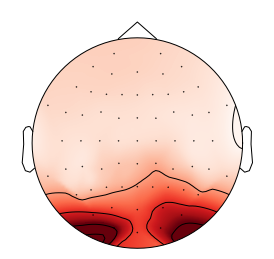

(<matplotlib.image.AxesImage at 0x18f81168d68>,
 <matplotlib.contour.QuadContourSet at 0x18ffa4f5ef0>)

In [55]:
# sprawdźcie sobię dokumentację dotyczącą funkcji plot_topomap
# podstawowy interfejs jest taki:
plot_topomap(alpha_topo, raw.info)

## Praca domowa
Tworzycie nowy notebook zawierający tylko konieczne kroki prowadzące do:
* wyświetlenia topografii dla alfy podczas oczu zamkniętych oraz alfy podczas oczu otwartych
* wyświetlenia różnicy topografii zamknięte - otwarte
* wreszcie wyświetlcie różnicę zlogarytmizowanych danych (to nie to samo co logarytm różnicy - różnica w przestrzeni zlogarytmizowanych danych to dzielenie w przestrzeni liniowej!).